# 1D Speckle Generation & Analysis

**Scott Prahl**

**August 2023**

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pyspeckle")

import pyspeckle

## Exponential autocorrelation generation

Generate a speckle pattern with a specific average and standard deviation, but also with an exponentially decaying autocorrelation function.

### Validate basic uniform random number generation

Before starting with speckle, lets do explore a uniform random number distribution.

He we generate a uniform random number distribution with a specific average and standard deviation, but also with an exponentially decaying autocorrelation function.

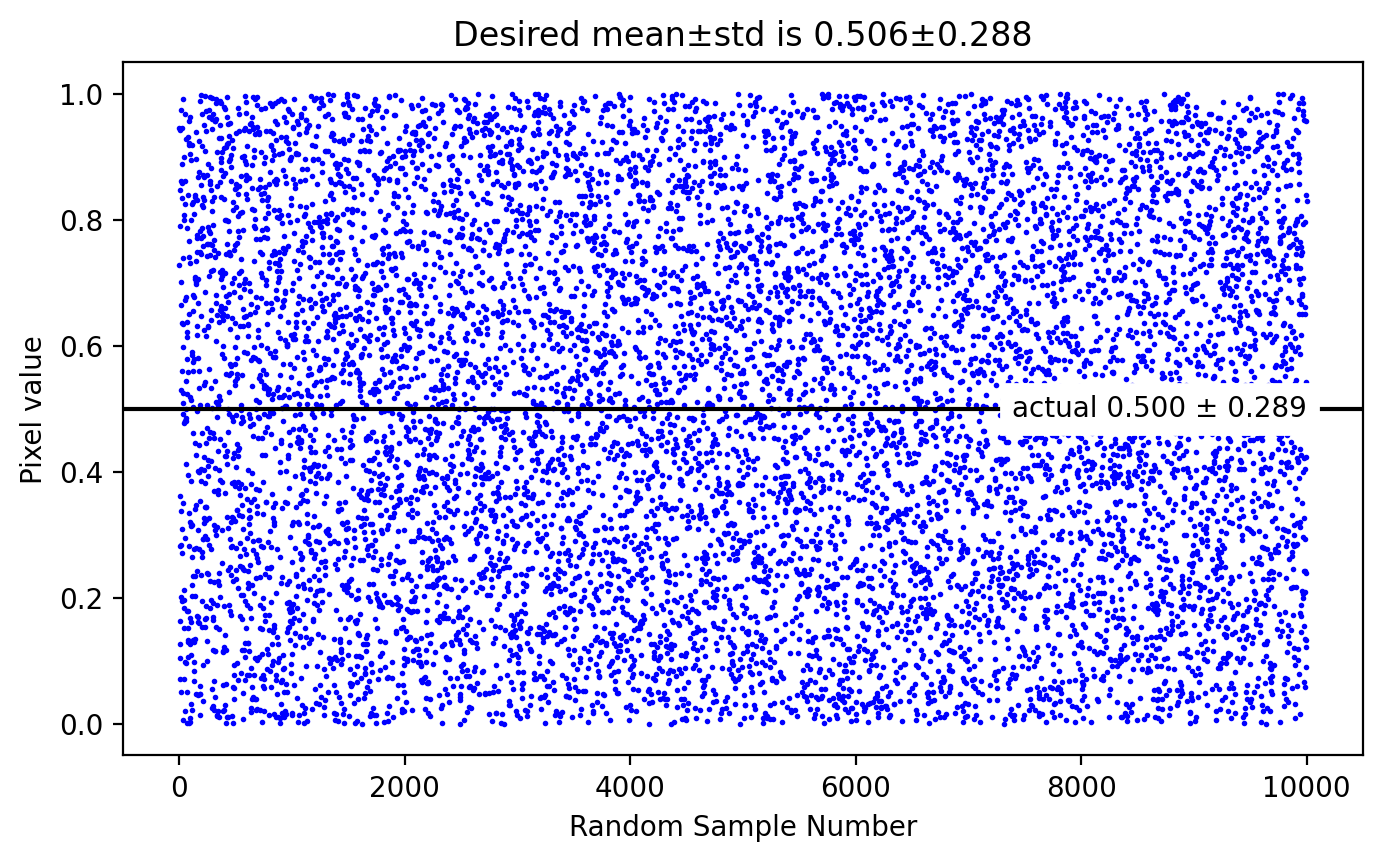

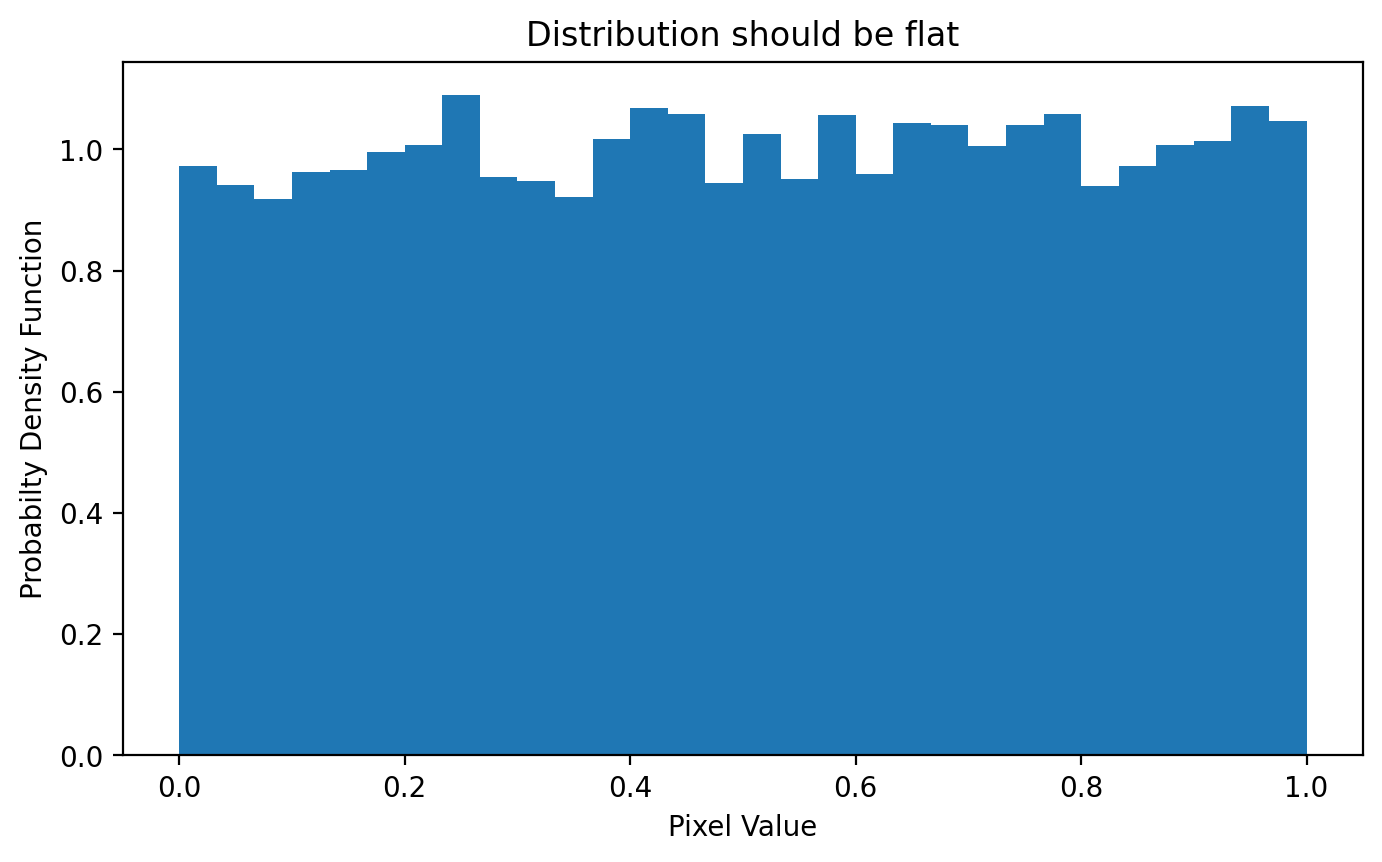

In [2]:
target_length = 10000
target_ave = 1 / 2
target_std = (1 - 0) / np.sqrt(12)
y = np.random.random(target_length)

# calculated values from generated y values
ave = np.mean(y)
std = np.sqrt(np.var(y))

plt.plot(y, "ob", markersize=1)
plt.axhline(target_ave, color="black")
plt.text(
    target_length,
    target_ave,
    "actual %.3f ± %.3f" % (target_ave, target_std),
    ha="right",
    va="center",
    backgroundcolor="white",
)
plt.title("Desired mean±std is %.3f±%.3f" % (ave, std))
plt.xlabel("Random Sample Number")
plt.ylabel("Pixel value")
plt.show()


count, bins, ignored = plt.hist(y, 30, density=True)
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Distribution should be flat")
plt.show()

### Tests for average and standard deviation of the speckle

Here we just make sure that the average and standard deviation of the speckle array is correct.

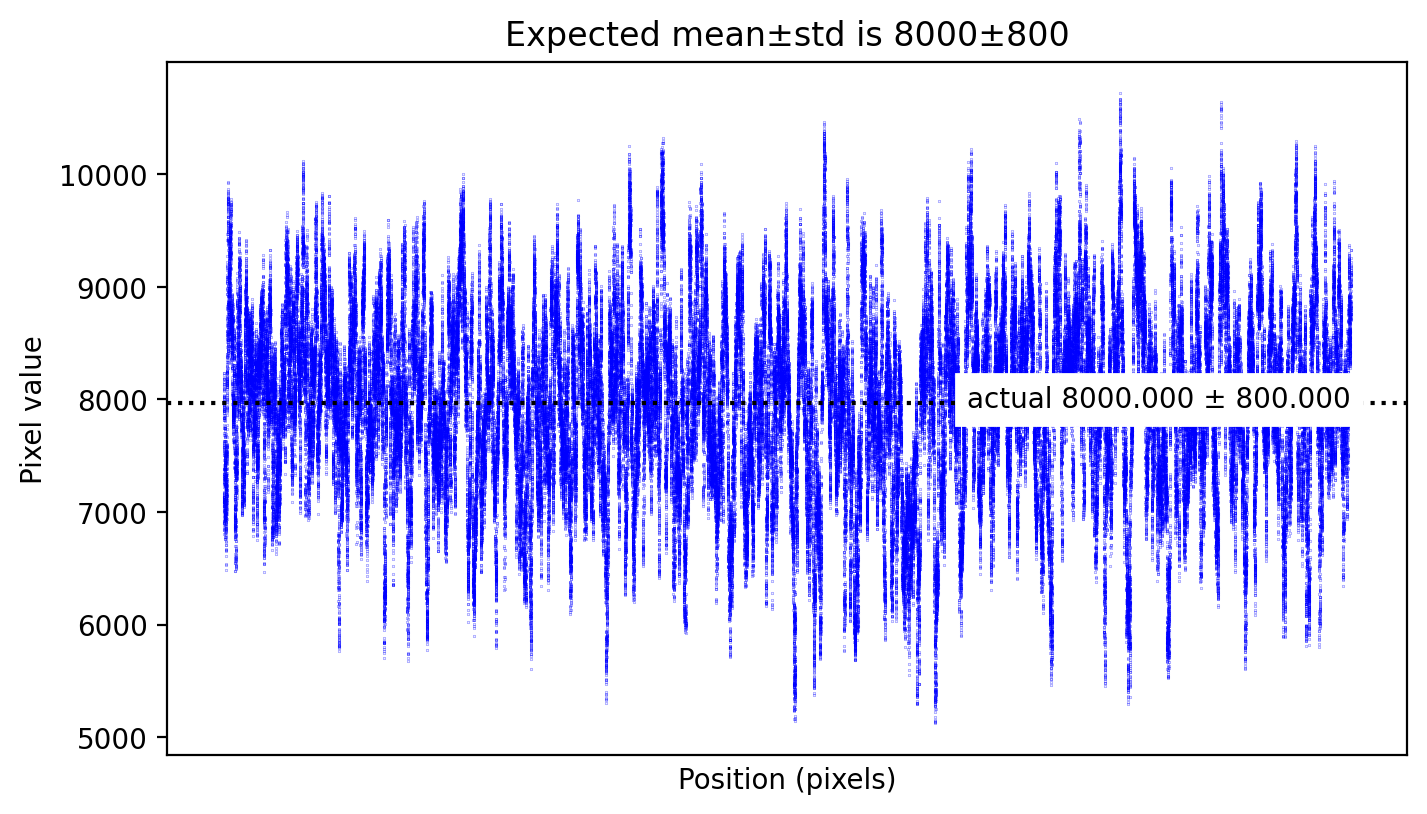

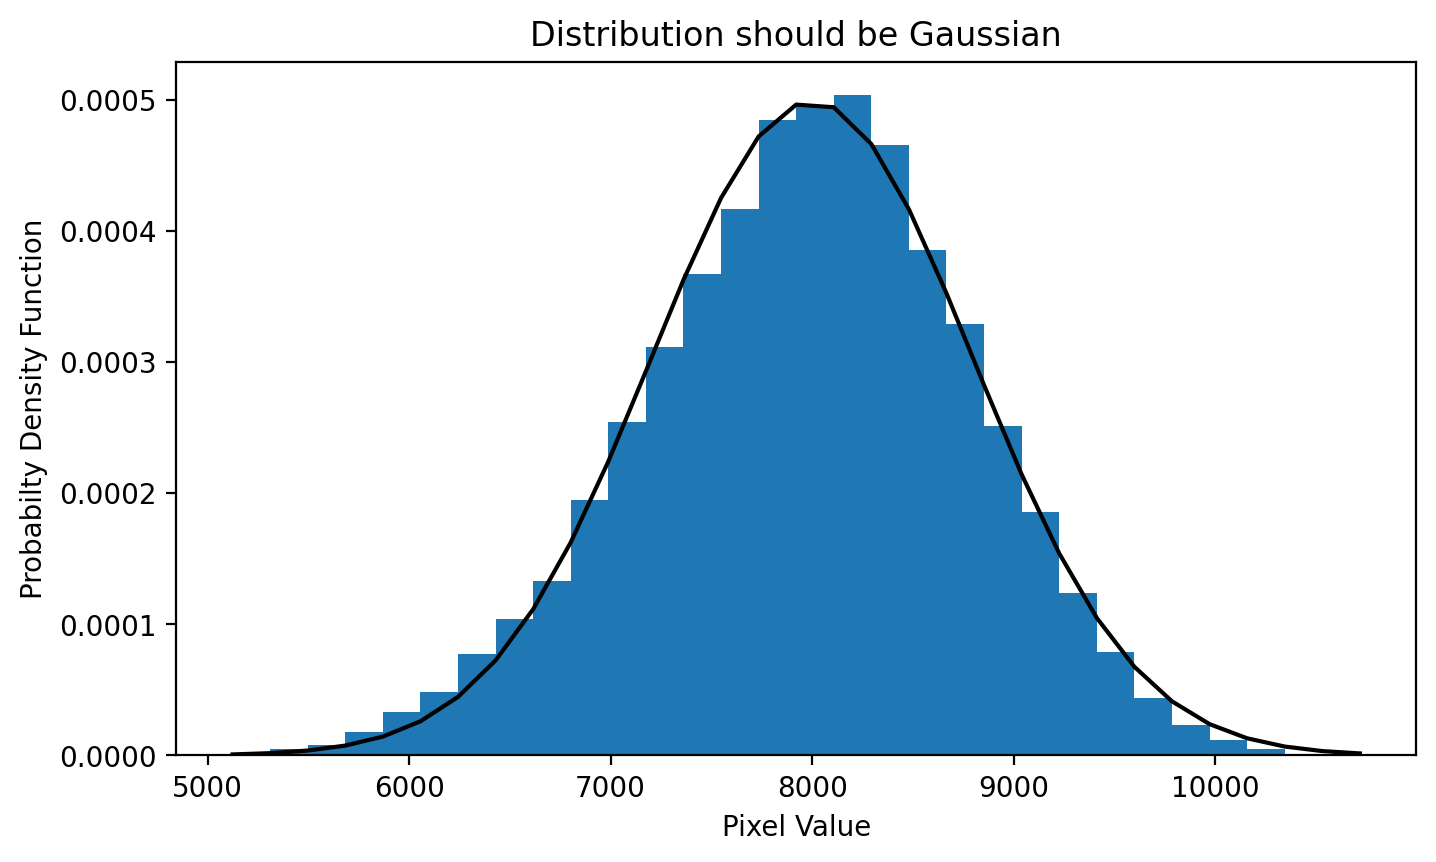

In [3]:
target_length = 200000  # number of pixels in speckle realization
correlation_length = 300  # correlation length in pixels
target_ave = 8000  # target average value of speckle
target_std = 800  # target standard deviation of pixel values

y = pyspeckle.create_exp_1D(target_length, target_ave, target_std, correlation_length)

ave = np.mean(y)
std = np.sqrt(np.var(y))

plt.plot(y, "ob", markersize=0.1)
plt.axhline(ave, ls=":", color="black")
plt.text(
    target_length,
    target_ave,
    "actual %.3f ± %.3f" % (target_ave, target_std),
    ha="right",
    va="center",
    backgroundcolor="white",
)
plt.title("Expected mean±std is %.0f±%0.f" % (target_ave, target_std))
plt.xlabel("Position (pixels)")
plt.ylabel("Pixel value")
plt.xticks([])
plt.show()

count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins, 1 / (target_std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((bins - target_ave) / target_std) ** 2), "k")
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Distribution should be Gaussian")
plt.show()

Repeat for several 1D speckle realizations with different average values but the same standard deviation.

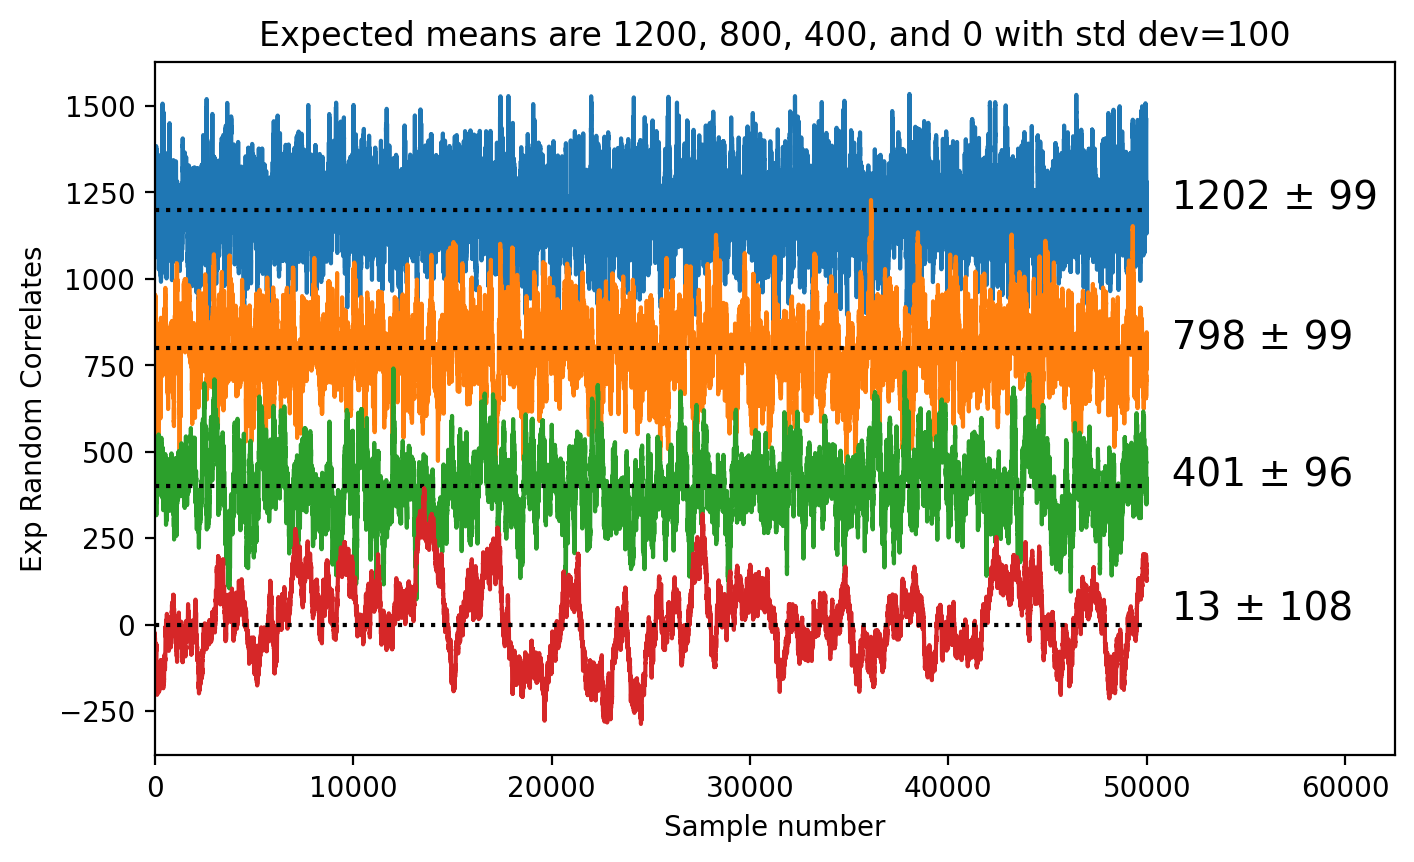

In [4]:
target_length = 50000
target_std = 100

target_ave = 1200
y = pyspeckle.create_exp_1D(target_length, target_ave, target_std, 20)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.text(target_length, ave, "  %.0f ± %.0f" % (ave, std), fontsize=14)
plt.plot(y)
plt.plot([0, target_length], [target_ave, target_ave], ":k")

target_ave = 800
y = pyspeckle.create_exp_1D(target_length, target_ave, target_std, 50)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.text(target_length, ave, "  %.0f ± %.0f" % (ave, std), fontsize=14)
plt.plot(y)
plt.plot([0, target_length], [target_ave, target_ave], ":k")

target_ave = 400
y = pyspeckle.create_exp_1D(target_length, target_ave, target_std, 100)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.text(target_length, ave, "  %.0f ± %.0f" % (ave, std), fontsize=14)
plt.plot(y)
plt.plot([0, target_length], [target_ave, target_ave], ":k")

target_ave = 0
y = pyspeckle.create_exp_1D(target_length, target_ave, target_std, 500)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.text(target_length, ave, "  %.0f ± %.0f" % (ave, std), fontsize=14)
plt.plot(y)
plt.plot([0, target_length], [target_ave, target_ave], ":k")

plt.xlim(0, target_length * 1.25)
plt.title("Expected means are 1200, 800, 400, and 0 with std dev=%.0f" % target_std)
plt.xlabel("Sample number")
plt.ylabel("Exp Random Correlates")
# plt.savefig('oneD_example.png', dpi=300)
plt.show()

## Validate autocorrelation shape

The points should be distributed so that the autocorrelation is a decaying exponential

$$
\langle X,X\rangle = \exp\left(-\frac{x}{\tau}\right)
$$

This is normalized to unity when the offset is zero.

`help(pyspeckle.autocorrelation)`

will give 

Help on function autocorrelation in module pyspeckle.pyspeckle:

autocorrelation(x)
    Find the autocorrelation of a 1D array.
    
    This is a little different from the standard autocorrelation because
    (1) the mean is subtracted before correlation
    (2) the autocorrelation is normalized to maximum value
    (3) only the right hand side of the symmetric function is returned
    
    Args:
        x: 1D array
    
    Returns:
        autocorrelation array of same length

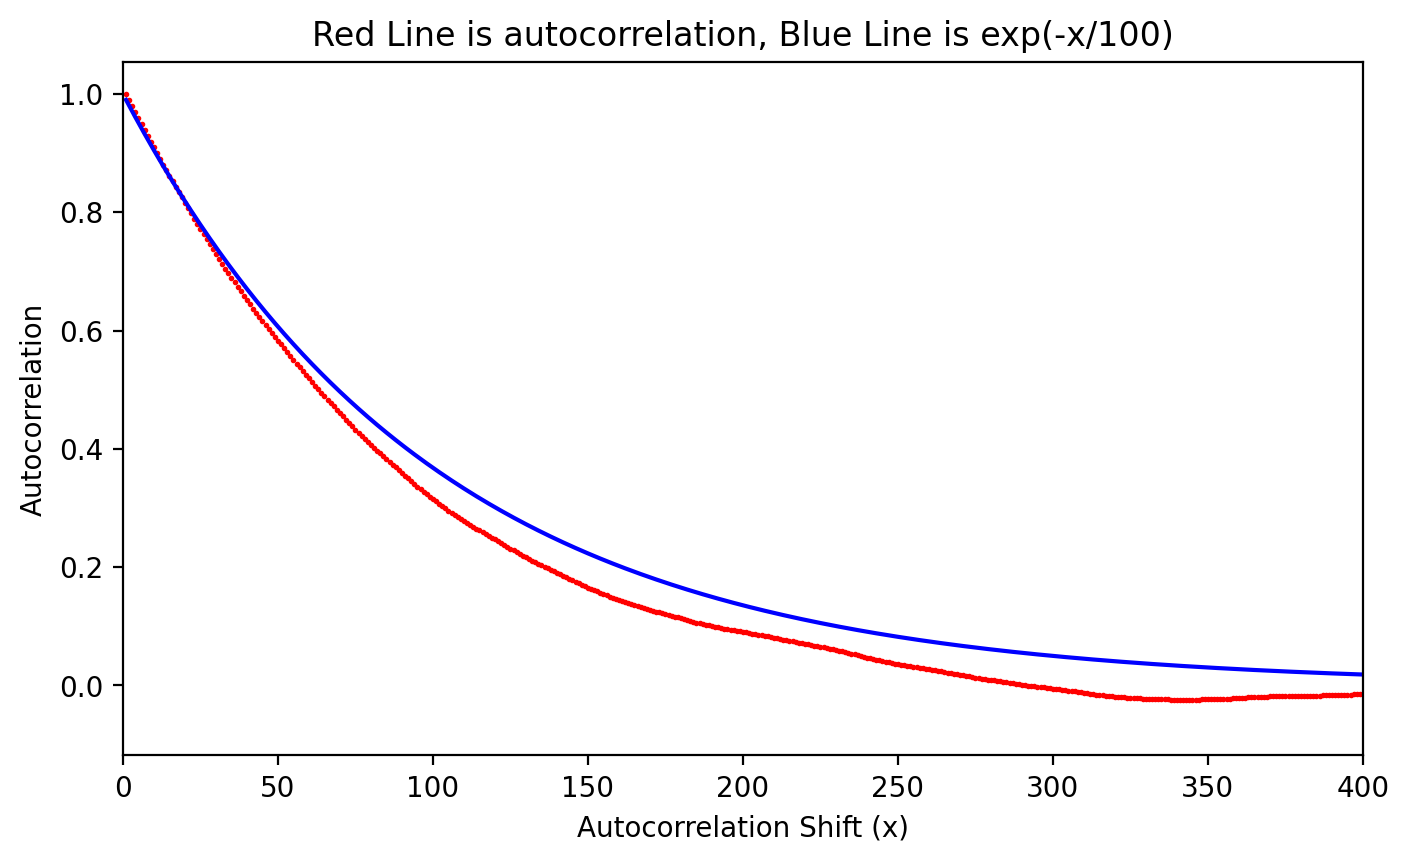

In [5]:
target_length = 100000
correlation_length = 100

x = np.linspace(1, target_length + 1, target_length)
y = pyspeckle.create_exp_1D(target_length, 200, 100, correlation_length)

ac = pyspeckle.autocorrelation(y)
plt.plot(x, ac, "ro", markersize=1)

plt.xlim(0, 4 * correlation_length)
plt.plot(x, np.exp(-x / correlation_length), color="blue")

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-x/%.0f)" % correlation_length)
plt.xlabel("Autocorrelation Shift (x)")
plt.ylabel("Autocorrelation")

plt.show()

## Speckle with Gaussian autocorrelation

This seems to work nicely.  To match theory, the speckle realization should be much longer than the correlation length `correlation_length` (perhaps by a factor of 50).

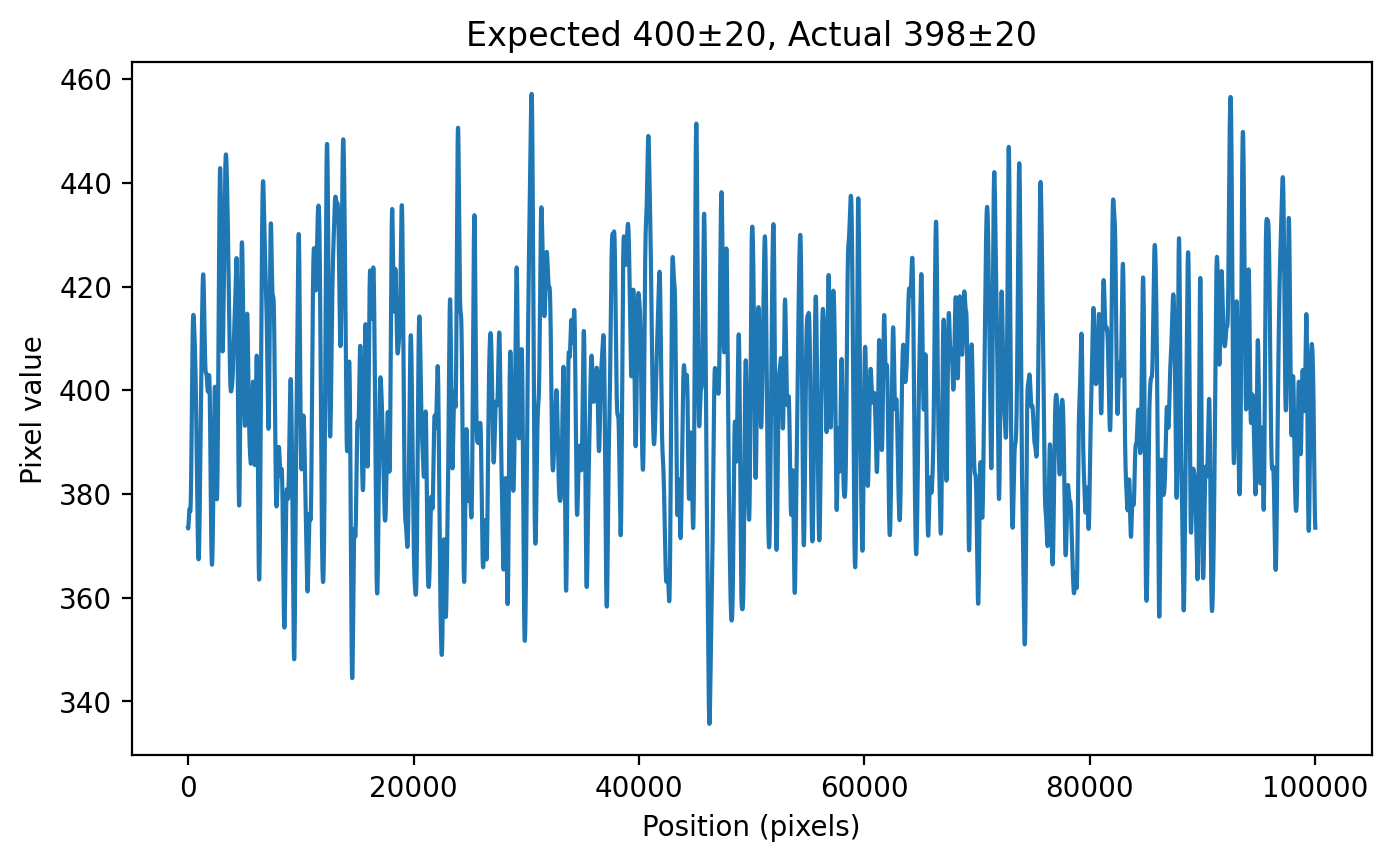

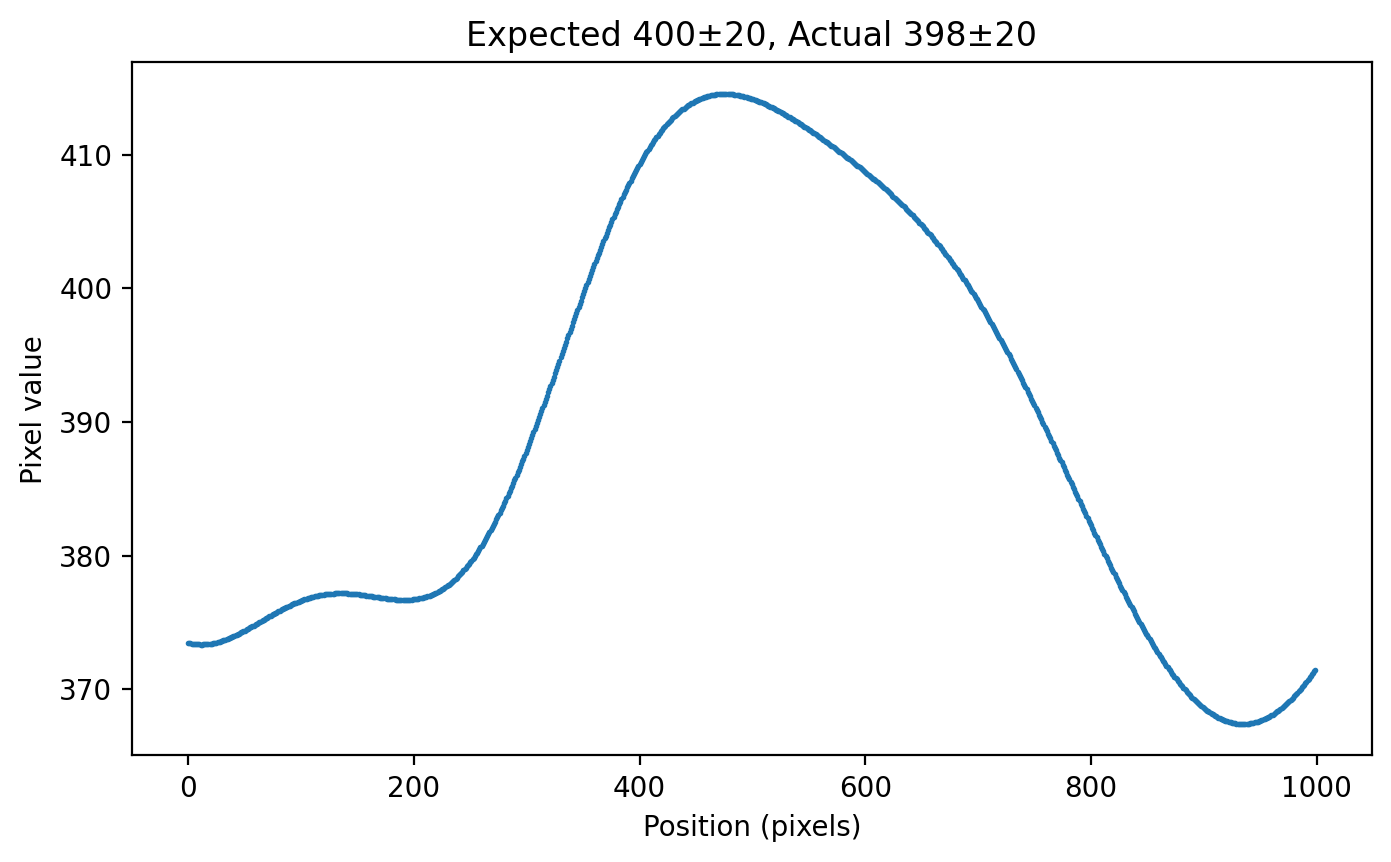

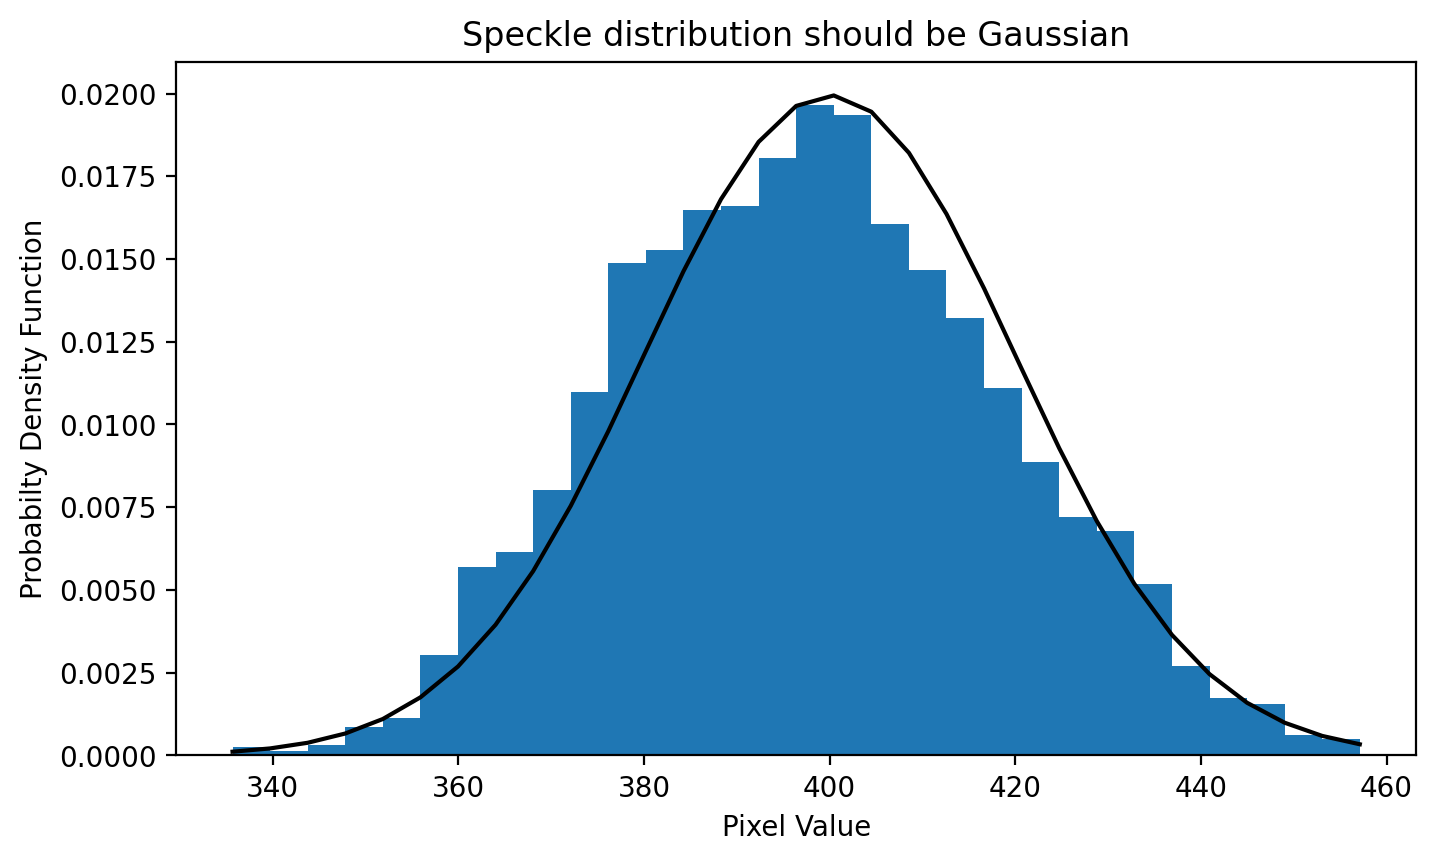

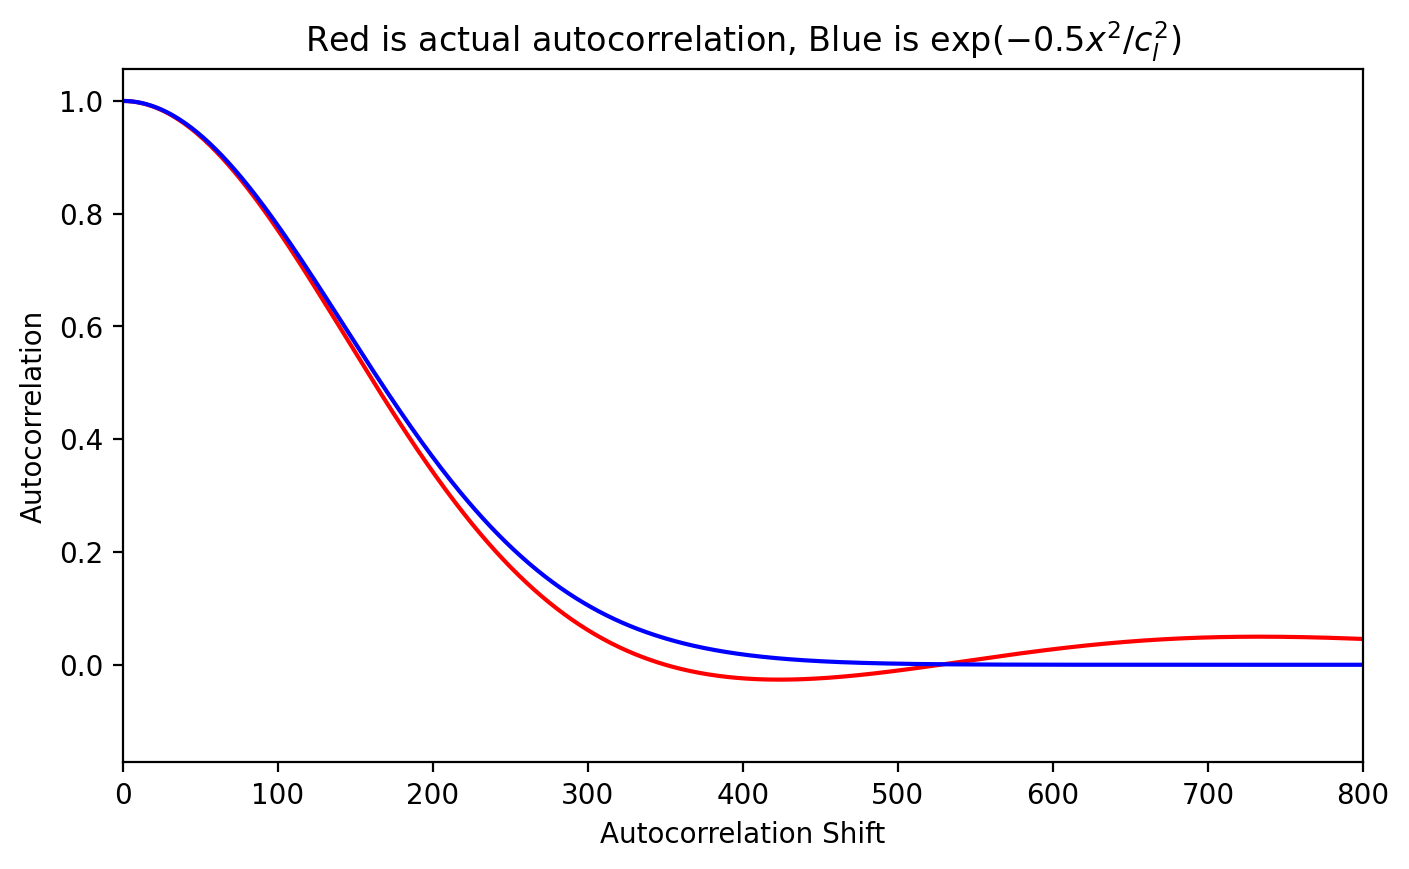

In [6]:
target_length = 100000
x = np.linspace(0, target_length - 1, target_length)
target_std = 20
target_ave = 400
correlation_length = 200

y = pyspeckle.create_gaussian_1D(target_length, target_ave, target_std, correlation_length)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.plot(y)
plt.title("Expected %.0f±%0.f, Actual %.0f±%0.f" % (target_ave, target_std, ave, std))
plt.xlabel("Position (pixels)")
plt.ylabel("Pixel value")
plt.show()

plt.plot(y[:1000], "o", markersize=1)
plt.title("Expected %.0f±%0.f, Actual %.0f±%0.f" % (target_ave, target_std, ave, std))
plt.xlabel("Position (pixels)")
plt.ylabel("Pixel value")
plt.show()


count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins, 1 / (target_std * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((bins - target_ave) / target_std) ** 2), "k")
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Speckle distribution should be Gaussian")
plt.show()

ac = pyspeckle.autocorrelation(y)
plt.plot(x, ac, color="red")

plt.xlim(0, 4 * correlation_length)
plt.plot(x, np.exp(-0.5 * x**2 / (correlation_length**2 / 2)), color="blue")

plt.title(r"Red is actual autocorrelation, Blue is $\exp(-0.5x^2/c_l^2)$")
plt.xlabel("Autocorrelation Shift")
plt.ylabel("Autocorrelation")

plt.show()